In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, dtype={'fullVisitorId': 'str'},converters={column: json.loads for column in JSON_COLUMNS})
    
    for each in JSON_COLUMNS:
        column_as_df = json_normalize(df[each])
        keys_ = column_as_df.keys()
        new_col_names = [each+"."+subkey for subkey in keys_]
        i=0
        
        for x in keys_:
            col = column_as_df[x]
            df[new_col_names[i]] = pd.Series(col)
            i=i+1
    return df
   
    

In [2]:
data =load_df("train.csv")

In [3]:
data.shape

(903653, 59)

In [4]:
data.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserSize', 'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.metro', 'geoNetwork.networkDomain',
       'geoNetwork.networkLocation', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisi

In [5]:
data = data.drop('device',axis=1)
data = data.drop('geoNetwork',axis=1)
data = data.drop('totals',axis=1)
data=data.drop('trafficSource',axis=1)


In [183]:
testData = load_df("test.csv")

In [184]:
testData = testData.drop('geoNetwork',axis=1)
testData = testData.drop('totals',axis=1)
testData=testData.drop('trafficSource',axis=1)
testData =testData.drop('device',axis=1)

In [8]:
print("Missing Values Percentage ..........\n")
tot_cols = 0
for each in data.columns :
    count=data[each].isnull().sum()
    if count>0:
        print (each + "\t"+str(round((count/data.shape[0]*100.0),2)))
        tot_cols = tot_cols+1
print ("Total Columns : " + str(tot_cols))

Missing Values Percentage ..........

totals.bounces	50.13
totals.newVisits	22.2
totals.pageviews	0.01
totals.transactionRevenue	98.73
trafficSource.adContent	98.79
trafficSource.adwordsClickInfo.adNetworkType	97.63
trafficSource.adwordsClickInfo.gclId	97.61
trafficSource.adwordsClickInfo.isVideoAd	97.63
trafficSource.adwordsClickInfo.page	97.63
trafficSource.adwordsClickInfo.slot	97.63
trafficSource.campaignCode	100.0
trafficSource.isTrueDirect	69.68
trafficSource.keyword	55.66
trafficSource.referralPath	63.38
Total Columns : 14


In [9]:
data = data.drop('trafficSource.campaignCode',axis=1)

In [10]:
tot_cols = 0
const_cols=[]
for each in data.columns:
    count=data[each].nunique(dropna=False)
    if(count < 3):
        print (each)
        print(data[each].unique())
        tot_cols = tot_cols +1
        const_cols.append(each)
print ("Total Constant Columns : " + str(tot_cols))

socialEngagementType
['Not Socially Engaged']
device.browserSize
['not available in demo dataset']
device.browserVersion
['not available in demo dataset']
device.flashVersion
['not available in demo dataset']
device.isMobile
[False  True]
device.language
['not available in demo dataset']
device.mobileDeviceBranding
['not available in demo dataset']
device.mobileDeviceInfo
['not available in demo dataset']
device.mobileDeviceMarketingName
['not available in demo dataset']
device.mobileDeviceModel
['not available in demo dataset']
device.mobileInputSelector
['not available in demo dataset']
device.operatingSystemVersion
['not available in demo dataset']
device.screenColors
['not available in demo dataset']
device.screenResolution
['not available in demo dataset']
geoNetwork.cityId
['not available in demo dataset']
geoNetwork.latitude
['not available in demo dataset']
geoNetwork.longitude
['not available in demo dataset']
geoNetwork.networkLocation
['not available in demo dataset']
totals

In [11]:
const_cols.remove('device.isMobile')

In [12]:
device_cols=[x for x in data if x.startswith('device')]
geoNetwork_col=[x for x in data if x.startswith('geoNetwork')]
trafficSource_cols=[x for x in data if x.startswith('trafficSource')]
totals_cols=[x for x in data if x.startswith('totals')]

In [185]:
data[totals_cols]=data[totals_cols].astype(float)
test_totals_cols=[x for x in testData.columns if x.startswith('totals')]
testData[test_totals_cols]=testData[test_totals_cols].astype(float)

In [186]:
ids=['fullVisitorId','sessionId','visitId']
data[ids]=data[ids].astype(str)
testData[ids]=testData[ids].astype(str)

In [15]:
data['date'] = data['date'].astype(str)
data["date"] = data["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
data["date"] = pd.to_datetime(data["date"])
data["month"]   = data['date'].dt.month
data["day"]     = data['date'].dt.day
data["weekday"] = data['date'].dt.weekday
data['year'] = data['date'].dt.year


In [187]:
testData['date'] = testData['date'].astype(str)
testData["date"] = testData["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
testData["date"] = pd.to_datetime(testData["date"])
testData["month"]   = testData['date'].dt.month
testData["day"]     = testData['date'].dt.day
testData["weekday"] = testData['date'].dt.weekday
testData['year'] = testData['date'].dt.year

In [17]:
cat_cols=[]
cat_cols = device_cols+geoNetwork_col+trafficSource_cols
cat_cols.append('channelGrouping')


In [188]:
# data['totals.bounces'].fillna(0,inplace=True)
# data['totals.hits'].fillna(0,inplace=True)
# data['totals.pageviews'].fillna(0,inplace=True)
# data['totals.transactionRevenue'].fillna(0,inplace=True)
# data['totals.newVisits'].fillna(0,inplace=True)
# data['totals.visits'].fillna(0,inplace=True)
testData['totals.pageviews'].fillna(0,inplace=True)
testData['totals.hits'].fillna(0,inplace=True)
testData['totals.bounces'].fillna(0,inplace=True)
testData['totals.newVisits'].fillna(0,inplace=True)
testData['totals.visits'].fillna(0,inplace=True)

In [19]:
data.loc[data['totals.transactionRevenue']> 0.0 , 'isBuy'] = 1
data.loc[data['totals.transactionRevenue'] == 0.0, 'isBuy'] = 0

In [89]:
features=[x  for x in data.columns if x not in const_cols+ids]

In [21]:
data[features].corr()

,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,totals.transactionRevenue,month,day,weekday,year,isBuy
visitNumber,1.000000,0.002069,-0.037667,0.041317,0.043332,0.051366,-0.011275,-0.002789,-0.020131,0.007876,0.022251
visitStartTime,0.002069,1.000000,0.144332,-0.027701,-0.022262,0.002724,-0.502336,0.065540,0.001757,0.863070,0.010937
device.isMobile,-0.037667,0.144332,1.000000,-0.030367,-0.030180,-0.016555,-0.106979,0.001725,0.078937,0.144849,-0.045337
totals.hits,0.041317,-0.027701,-0.030367,1.000000,0.983201,0.154333,0.003124,-0.005031,-0.011682,-0.017502,0.373274
totals.pageviews,0.043332,-0.022262,-0.030180,0.983201,1.000000,0.155589,-0.002312,-0.004807,-0.012453,-0.011248,0.395914
totals.transactionRevenue,0.051366,0.002724,-0.016555,0.154333,0.155589,1.000000,-0.002849,0.000561,-0.007812,0.003194,0.284227
month,-0.011275,-0.502336,-0.106979,0.003124,-0.002312,-0.002849,1.000000,-0.016556,0.008059,-0.868272,-0.002619
day,-0.002789,0.065540,0.001725,-0.005031,-0.004807,0.000561,-0.016556,1.000000,-0.018971,-0.001131,-0.000760
weekday,-0.020131,0.001757,0.078937,-0.011682,-0.012453,-0.007812,0.008059,-0.018971,1.000000,-0.002786,-0.014319
year,0.007876,0.863070,0.144849,-0.017502,-0.011248,0.003194,-0.868272,-0.001131,-0.002786,1.000000,0.007835


In [22]:
data.dtypes

channelGrouping                                              object
date                                                 datetime64[ns]
fullVisitorId                                                object
sessionId                                                    object
socialEngagementType                                         object
visitId                                                      object
visitNumber                                                   int64
visitStartTime                                                int64
device.browser                                               object
device.browserSize                                           object
device.browserVersion                                        object
device.deviceCategory                                        object
device.flashVersion                                          object
device.isMobile                                                bool
device.language                                 

In [23]:
visitorData = data.groupby("fullVisitorId")
agg_dict = {}
for col in ["totals.hits", "totals.pageviews", "totals.transactionRevenue"]:
    data[col] = data[col].astype('float')
    agg_dict[col] = "sum"
data['visitNumber'] = data['visitNumber'].astype('float')
agg_dict['visitNumber']="max"
visitorData = data.groupby("fullVisitorId").agg(agg_dict).reset_index()
visitorData.head()

,fullVisitorId,totals.hits,totals.pageviews,totals.transactionRevenue,visitNumber
0,0000010278554503158,11.0,8.0,0.0,1.0
1,0000020424342248747,17.0,13.0,0.0,1.0
2,0000027376579751715,6.0,5.0,0.0,1.0
3,0000039460501403861,2.0,2.0,0.0,1.0
4,0000040862739425590,5.0,5.0,0.0,2.0


In [24]:
def visit_bins(x):
    if x==1:
        return "1"
    elif x> 1 and x <= 5:
        return "2-5"
    elif x>5 and x <= 10:
        return "5-10"
    elif x>10 and x<= 20: 
        return "10-20"
    elif x>20 and x <= 50:
        return "20-50"
    elif x>50 and x <= 100:
        return "50-100"
    else:
        return "100+"

In [25]:
visitorData['visitBin'] = visitorData.visitNumber.apply(visit_bins)
avgRevenue = visitorData.groupby("visitBin")['totals.transactionRevenue'].mean()


<Figure size 576x432 with 0 Axes>

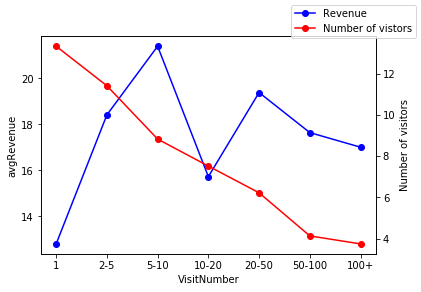

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots()

ax1.plot(["1","2-5","5-10","10-20","20-50","50-100","100+"],np.log(avgRevenue),color='b',label="Revenue",marker="o")
ax1.set_xlabel('VisitNumber')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('avgRevenue')

ax2 = ax1.twinx()
ax2.plot(["1","2-5","5-10","10-20","20-50","50-100","100+"],np.log(visitorData.visitBin.value_counts()),color='r',label="Number of vistors",marker="o")
ax2.set_ylabel('Number of visitors')

fig.legend()
plt.savefig("corr1.png")
plt.show()

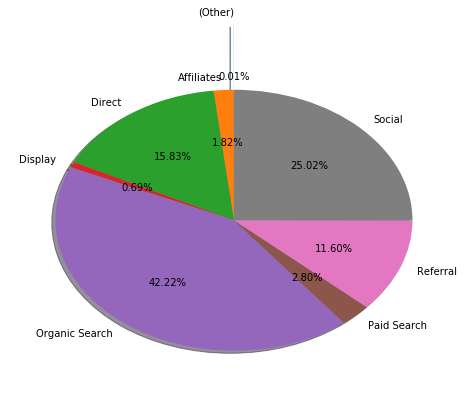

In [29]:
channel = data.groupby('channelGrouping')
names=[]
sizeChannel=channel.size()
for name,groups  in channel:
    names.append(name)
plt.figure(figsize=(8,6))
explode=[0.5,0,0,0,0,0,0,0]
plt.pie(channel.size(), labels=names,explode = explode,
        shadow=True, startangle=90,autopct='%1.2f%%',)
plt.savefig('channelsCl.png')
plt.title("Percentage of Visits : Channel")

plt.show()


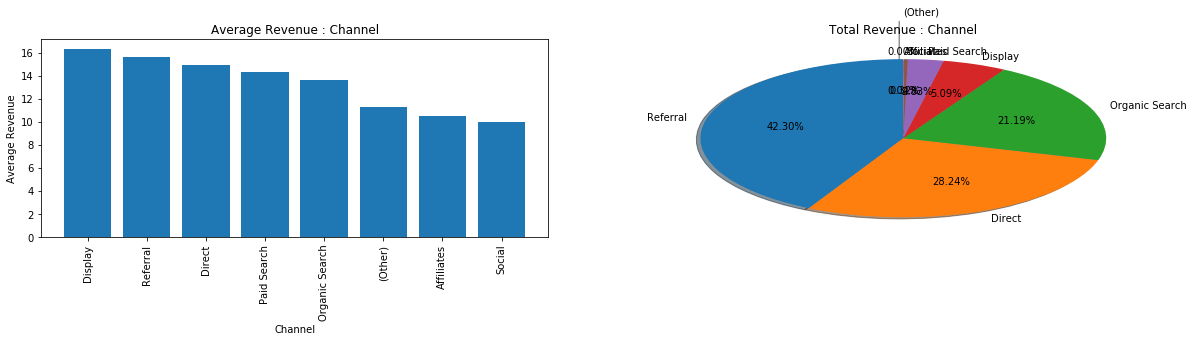

In [30]:
channelRevenue = data.groupby('channelGrouping').agg({"totals.transactionRevenue": "mean"}).reset_index()
channelRevenue = channelRevenue.sort_values(by='totals.transactionRevenue',ascending=False,axis=0) 
plt.figure(figsize=(20,8))

plt.subplot(221)
plt.bar(channelRevenue['channelGrouping'],np.log(channelRevenue['totals.transactionRevenue']))
plt.xlabel("Channel")
plt.xticks(rotation=90)
plt.ylabel("Average Revenue")
plt.title("Average Revenue : Channel")

plt.subplot(222)
channelRevenueSum = data.groupby('channelGrouping').agg({"totals.transactionRevenue": "sum"}).reset_index()
channelRevenueSum = channelRevenueSum.sort_values(by='totals.transactionRevenue',ascending=False,axis=0) 
explode=[0,0,0,0,0,0,0,0.5]
plt.pie(channelRevenueSum['totals.transactionRevenue'], labels=channelRevenueSum['channelGrouping'],explode = explode,
        shadow=True, startangle=90,autopct='%1.2f%%',)
plt.title("Total Revenue : Channel")
plt.savefig('Revenue:Channel.png')
plt.show()

In [34]:
data['pageView/hit']=np.round(data['totals.pageviews'].astype(float) / data['totals.hits'].astype(float),decimals=1)



In [39]:
ratiodata = data.groupby('pageView/hit').agg({"totals.transactionRevenue": "sum"}).reset_index()


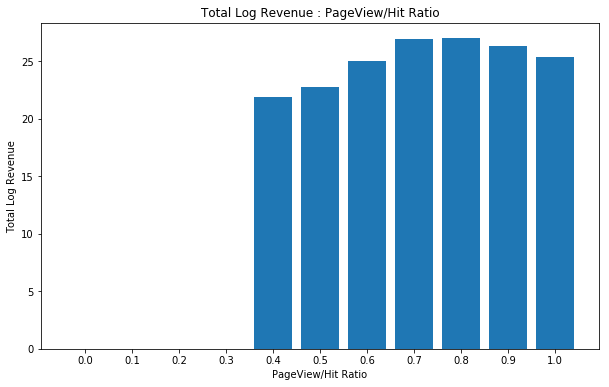

In [46]:
plt.figure(figsize=(10,6))

plt.bar(ratiodata['pageView/hit'].astype(str),np.log1p(ratiodata['totals.transactionRevenue']))
plt.xlabel("PageView/Hit Ratio")
plt.ylabel("Total Log Revenue")
plt.title("Total Log Revenue : PageView/Hit Ratio")
plt.savefig('RatioRevenue.png')
plt.show()

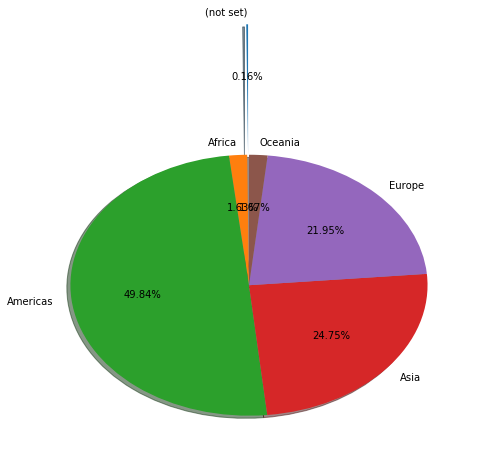

In [47]:
geoContinent = data.groupby('geoNetwork.continent')
names=[]
geoSize=geoContinent.size()

for name,groups  in geoContinent:
    names.append(name)

plt.figure(figsize=(8,6))
explode=[1,0,0,0,0,0]
plt.pie(geoSize, labels=names,explode = explode,
        shadow=True, startangle=90,autopct='%1.2f%%',)
plt.savefig('Visits:EachContinent1Pie.png')
plt.show()

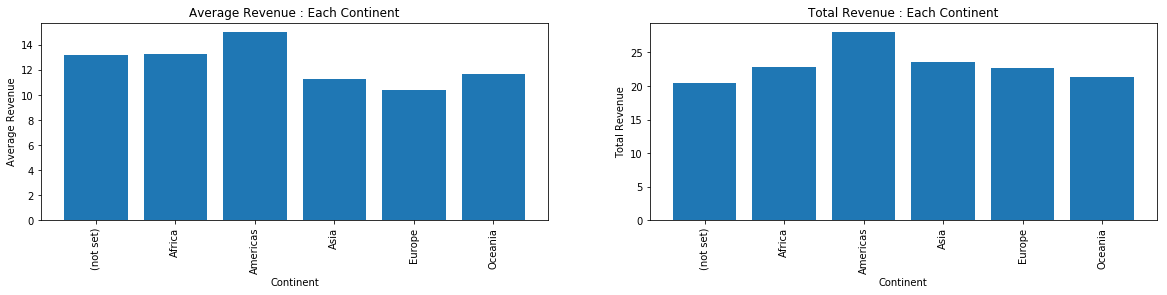

In [48]:
geoRevenue = data.groupby('geoNetwork.continent').agg({"totals.transactionRevenue": "mean"}).reset_index()
geoRevenueTot = data.groupby('geoNetwork.continent').agg({"totals.transactionRevenue": "sum"}).reset_index()
plt.figure(figsize=(20,8))
plt.subplot(221)
plt.bar(geoRevenue['geoNetwork.continent'],np.log1p(geoRevenue['totals.transactionRevenue']))
plt.xlabel("Continent")
plt.xticks(rotation=90)
plt.ylabel("Average Revenue")
plt.title("Average Revenue : Each Continent")

plt.subplot(222)
plt.bar(geoRevenueTot['geoNetwork.continent'],np.log1p(geoRevenueTot['totals.transactionRevenue']))
plt.xlabel("Continent")
plt.xticks(rotation=90)
plt.ylabel("Total Revenue")
plt.title("Total Revenue : Each Continent")
plt.savefig('Revenue:EachContinent1.png')
plt.show()

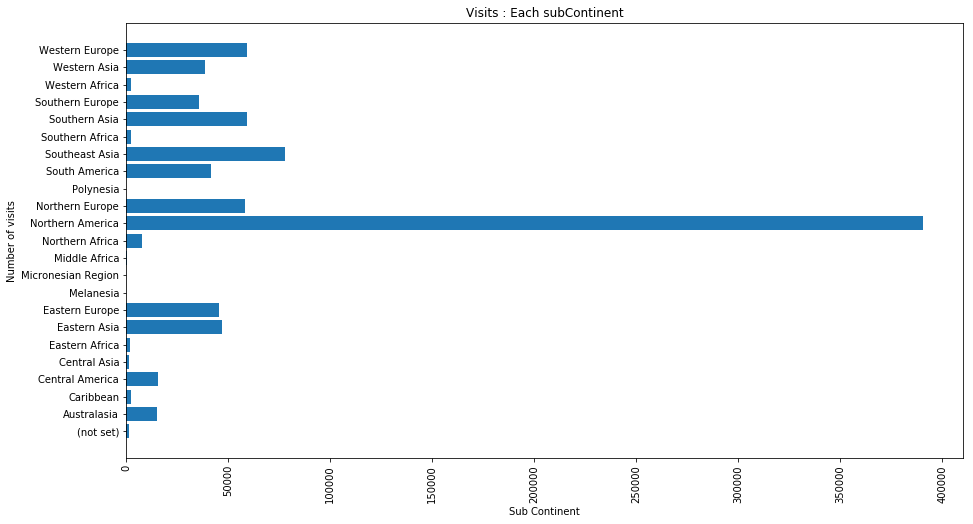

In [54]:
geoSub = data.groupby('geoNetwork.subContinent')
names=[]
geoSize=geoSub.size()
for name,groups  in geoSub:
    names.append(name)
    
plt.figure(figsize=(15,8))
plt.barh(names,geoSub.size())
plt.xlabel("Sub Continent")
plt.xticks(rotation=90)
plt.ylabel("Number of visits")
plt.title("Visits : Each subContinent")
plt.savefig('Visits:EachsubContinent.png')
plt.show()

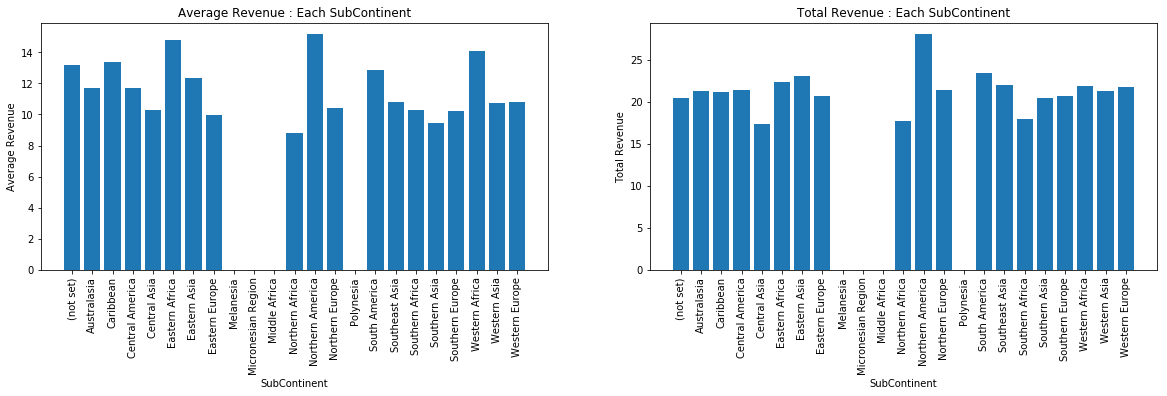

In [52]:
geoRevenueSub = data.groupby('geoNetwork.subContinent').agg({"totals.transactionRevenue": "mean"}).reset_index()
geoRevenueTot = data.groupby('geoNetwork.subContinent').agg({"totals.transactionRevenue": "sum"}).reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(geoRevenueSub['geoNetwork.subContinent'],np.log1p(geoRevenueSub['totals.transactionRevenue']))
plt.xlabel("SubContinent")
plt.xticks(rotation=90)
plt.ylabel("Average Revenue")
plt.title("Average Revenue : Each SubContinent")

plt.subplot(222)
plt.bar(geoRevenueTot['geoNetwork.subContinent'],np.log1p(geoRevenueTot['totals.transactionRevenue']))
plt.xlabel("SubContinent")
plt.xticks(rotation=90)
plt.ylabel("Total Revenue")
plt.title("Total Revenue : Each SubContinent")

plt.savefig('Revenue:EachsubContinent1.png')
plt.show()

In [55]:
probFeatures = ['visitNumber','totals.hits','totals.pageviews','pageView/hit']

In [56]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
regModel = logReg.fit(data[probFeatures],data['isBuy'])
regModel.coef_

array([[ 2.84377152e-03, -2.88813310e-01,  4.87069114e-01,
        -6.05315561e+00]])

In [57]:
featureWeight={}
i=0;
for each in probFeatures:
    featureWeight[each] = regModel.coef_[0][i]
    i=i+1
featureWeight

{'visitNumber': 0.0028437715225520513,
 'totals.hits': -0.2888133102653093,
 'totals.pageviews': 0.48706911427757127,
 'pageView/hit': -6.053155606550459}

In [58]:
probScore = 0.0029*data['visitNumber'] +(-0.2888)*data['totals.hits']+ 0.48706 * data['totals.pageviews']+(-6.0531)*data['pageView/hit']

import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [59]:
prob =[]
for each in probScore:
    prob.append(sigmoid(each))

In [67]:
predData = data

In [68]:
predData['predBuy'] = pd.Series(prob)


In [90]:
predFeatures=[x  for x in data.columns if x not in const_cols]

In [93]:
predFeatures.remove('predBuy')


In [95]:
buyerRank = predData[predFeatures].sort_values(by='predBuy',ascending=False,axis=0)
buyerRank.head(10)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,...,trafficSource.medium,trafficSource.referralPath,trafficSource.source,month,day,weekday,year,isBuy,pageView/hit,predBuy
600775,Direct,2017-03-04,5526675926038480325,5526675926038480325_1488663704,1488663704,1.0,1488663704,Chrome,desktop,False,...,(none),NaN,(direct),3,4,5,2017,1.0,0.9,1.0
321795,Organic Search,2016-08-26,7344519175727343086,7344519175727343086_1472240181,1472240181,25.0,1472240181,Chrome,desktop,False,...,organic,NaN,google,8,26,4,2016,1.0,0.9,1.0
321462,Social,2016-08-26,743123551680199202,743123551680199202_1472216705,1472216705,3.0,1472216705,Chrome,desktop,False,...,referral,/,facebook.com,8,26,4,2016,1.0,0.9,1.0
838596,Organic Search,2016-08-28,9894955795481014038,9894955795481014038_1472394195,1472394195,12.0,1472394195,Chrome,tablet,True,...,organic,NaN,google,8,28,6,2016,0.0,1.0,1.0
456141,Organic Search,2016-08-25,9264804092676520813,9264804092676520813_1472130683,1472130683,2.0,1472130683,Chrome,desktop,False,...,organic,NaN,google,8,25,3,2016,1.0,0.9,1.0
456142,Organic Search,2016-08-25,3924372865099736100,3924372865099736100_1472132217,1472132217,1.0,1472132217,Chrome,desktop,False,...,organic,NaN,google,8,25,3,2016,1.0,0.9,1.0
321461,Social,2016-08-26,2920116282116200226,2920116282116200226_1472239187,1472239187,2.0,1472239187,Chrome,tablet,True,...,referral,/,m.facebook.com,8,26,4,2016,1.0,0.9,1.0
88736,Referral,2017-03-18,6879336706336070910,6879336706336070910_1489823400,1489823400,1.0,1489823400,Chrome,desktop,False,...,referral,/mail/u/0/,mail.google.com,3,18,5,2017,1.0,0.8,1.0
138750,Direct,2017-03-20,8942866004645538967,8942866004645538967_1489999542,1489999542,1.0,1489999542,Chrome,desktop,False,...,(none),NaN,(direct),3,20,0,2017,1.0,0.9,1.0
665266,Organic Search,2016-08-27,9894955795481014038,9894955795481014038_1472352428,1472352428,9.0,1472352428,Chrome,tablet,True,...,organic,NaN,google,8,27,5,2016,0.0,1.0,1.0


In [97]:
buyerRank[['fullVisitorId','visitNumber','pageView/hit','predBuy','totals.transactionRevenue']].head(10)

,fullVisitorId,visitNumber,pageView/hit,predBuy,totals.transactionRevenue
600775,5526675926038480325,1.0,0.9,1.0,8.796000e+07
321795,7344519175727343086,25.0,0.9,1.0,1.684900e+08
321462,743123551680199202,3.0,0.9,1.0,9.098000e+07
838596,9894955795481014038,12.0,1.0,1.0,0.000000e+00
456141,9264804092676520813,2.0,0.9,1.0,1.520530e+09
456142,3924372865099736100,1.0,0.9,1.0,1.720930e+09
321461,2920116282116200226,2.0,0.9,1.0,8.887000e+07
88736,6879336706336070910,1.0,0.8,1.0,1.339500e+08
138750,8942866004645538967,1.0,0.9,1.0,4.719200e+08
665266,9894955795481014038,9.0,1.0,1.0,0.000000e+00


In [252]:
buyerRank[['fullVisitorId','visitNumber','pageView/hit','predBuy','totals.transactionRevenue','geoNetwork.country','channelGrouping','geoNetwork.subContinent']].head(10)
           
           

,fullVisitorId,visitNumber,pageView/hit,predBuy,totals.transactionRevenue,geoNetwork.country,channelGrouping,geoNetwork.subContinent
600775,5526675926038480325,1.0,0.9,1.0,8.796000e+07,United States,Direct,Northern America
321795,7344519175727343086,25.0,0.9,1.0,1.684900e+08,Venezuela,Organic Search,South America
321462,743123551680199202,3.0,0.9,1.0,9.098000e+07,Venezuela,Social,South America
838596,9894955795481014038,12.0,1.0,1.0,0.000000e+00,Venezuela,Organic Search,South America
456141,9264804092676520813,2.0,0.9,1.0,1.520530e+09,Venezuela,Organic Search,South America
456142,3924372865099736100,1.0,0.9,1.0,1.720930e+09,Venezuela,Organic Search,South America
321461,2920116282116200226,2.0,0.9,1.0,8.887000e+07,United States,Social,Northern America
88736,6879336706336070910,1.0,0.8,1.0,1.339500e+08,Venezuela,Referral,South America
138750,8942866004645538967,1.0,0.9,1.0,4.719200e+08,United States,Direct,Northern America
665266,9894955795481014038,9.0,1.0,1.0,0.000000e+00,Venezuela,Organic Search,South America


In [249]:
buyerRank['fullVisitorId'].head(10)

600775    5526675926038480325
321795    7344519175727343086
321462     743123551680199202
838596    9894955795481014038
456141    9264804092676520813
456142    3924372865099736100
321461    2920116282116200226
88736     6879336706336070910
138750    8942866004645538967
665266    9894955795481014038
Name: fullVisitorId, dtype: object

In [98]:
gdp = pd.read_csv("/Users/krapi/Desktop/gdpData.csv")
gdp.columns

Index(['ContryCode', 'Economy', 'Gdp2017', 'Gdp2016', 'Unnamed: 4'], dtype='object')

In [99]:
countries = gdp['Economy']
dataCountry = data['geoNetwork.country']
common = list(set(countries) & set(dataCountry))
len(common)


195

In [100]:
code_dict = dict(zip(gdp.Economy, gdp.ContryCode))
dataCode = {}
for each in common :
    dataCode[each] = code_dict[each]

In [101]:
codesToAdd  = []
keys_ = dataCode.keys()
for each in data['geoNetwork.country']:
    if each in keys_:
        codesToAdd.append(dataCode[each])
    else:
        codesToAdd.append('NotYet')

In [102]:
predData['CountryCode'] = pd.Series(codesToAdd)

In [112]:
year16full = predData.loc[predData['year']==2016].reset_index()

In [113]:
year17full = predData.loc[predData['year']==2017].reset_index()

In [114]:
len(year16full) + len(year17full)

903653

In [115]:
gdp16dict = dict(zip(gdp.ContryCode, gdp.Gdp2016))
gdp17dict = dict(zip(gdp.ContryCode, gdp.Gdp2017))
gdp16dict['NotYet'] =""
gdp17dict['NotYet'] =""

In [118]:
g16full=[]
keys_ = gdp16dict.keys()
for each in year16full['CountryCode']:
    if each in keys_:
        g16full.append(gdp16dict[each])


In [121]:
g17full=[]
keys_ = gdp17dict.keys()
for each in year17full['CountryCode']:
    if each in keys_:
        g17full.append(gdp17dict[each])
    

In [122]:
year16full['gdp'] = pd.Series(g16full)
year17full['gdp'] = pd.Series(g17full)
gdpDataAddedfull = pd.concat([year16full, year17full])

In [124]:
gdpDataAddedfull['gdp'].replace('',0.1,inplace = True)
gdpDataAddedfull['gdp']=gdpDataAddedfull['gdp'].astype(float)

In [126]:
gdpDataAddedfull.drop('index',axis=1,inplace=True)

In [127]:
probFeaturesGdp = ['visitNumber','totals.hits','totals.pageviews','pageView/hit','gdp']

In [136]:
gdpDataAddedfull['gdp'].replace('',0.1,inplace = True)
gdpDataAddedfull['gdp']=gdpDataAddedfull['gdp'].astype(float)
gdpDataAddedfull['gdp'].fillna(0.0,inplace=True)

In [259]:
countGDp = gdpDataAddedfull.groupby('CountryCode').agg({"totals.transactionRevenue": "sum",'gdp':'mean'}).reset_index()
countGDp.corr()

,totals.transactionRevenue,gdp
totals.transactionRevenue,1.000000,0.469327
gdp,0.469327,1.000000


In [191]:
testData.describe()

,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,month,day,weekday,year
count,804684.000000,8.046840e+05,804684.000000,804684.000000,804684.000000,804684.000000,804684.0,804684.000000,804684.000000,804684.000000,804684.000000
mean,2.414087,1.513339e+09,0.523122,4.242126,0.751065,3.523133,1.0,6.852627,15.648780,2.734439,2017.426359
std,9.431737,6.676000e+06,0.499465,8.196982,0.432396,5.785698,0.0,3.953612,8.584767,1.927712,0.494548
min,1.000000,1.501657e+09,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,2017.000000
25%,1.000000,1.507548e+09,0.000000,1.000000,1.000000,1.000000,1.0,3.000000,8.000000,1.000000,2017.000000
50%,1.000000,1.513125e+09,1.000000,1.000000,1.000000,1.000000,1.0,8.000000,15.000000,3.000000,2017.000000
75%,1.000000,1.519227e+09,1.000000,4.000000,1.000000,4.000000,1.0,10.000000,23.000000,4.000000,2018.000000
max,457.000000,1.525158e+09,1.000000,500.000000,1.000000,500.000000,1.0,12.000000,31.000000,6.000000,2018.000000


In [137]:
logReg = LogisticRegression()
regModel = logReg.fit(gdpDataAddedfull[probFeaturesGdp],gdpDataAddedfull['isBuy'])

In [138]:
featureWeight={}
i=0;
for each in probFeatures:
    featureWeight[each] = regModel.coef_[0][i]
    i=i+1

featureWeight

{'visitNumber': -0.002239431085167076,
 'totals.hits': -0.21604857134918357,
 'totals.pageviews': 0.38334052533213625,
 'pageView/hit': -3.4887286344330835}

In [139]:
probScore = 0.0032*gdpDataAddedfull['visitNumber'] +(-0.2426)*gdpDataAddedfull['totals.hits']+ 0.4315 * gdpDataAddedfull['totals.pageviews']+(-3.0799)*gdpDataAddedfull['pageView/hit']
probScore = probScore + (0.0003)* gdpDataAddedfull['gdp']
prob =[]
for each in probScore:
    prob.append(sigmoid(each))
gdpDataAddedfull['predBuy'] = pd.Series(prob)


In [141]:
predFeaturesGdp = predFeatures
predFeaturesGdp.append('gdp')

In [142]:
buyerRankGDP = gdpDataAddedfull[predFeaturesGdp].sort_values(by='predBuy',ascending=False,axis=0)

In [260]:
buyerRankGDP[['fullVisitorId','visitNumber','pageView/hit','gdp','predBuy','totals.transactionRevenue','geoNetwork.country']].head(10)

,fullVisitorId,visitNumber,pageView/hit,gdp,predBuy,totals.transactionRevenue,geoNetwork.country
242661,7013004979695823802,1.0,0.9,1015.539,1.0,0.000000e+00,Indonesia
169345,2920116282116200226,2.0,0.9,18624.450,1.0,8.887000e+07,United States
344385,3304629535618457786,1.0,1.0,19390.604,1.0,0.000000e+00,United States
169346,743123551680199202,3.0,0.9,236.116,1.0,9.098000e+07,Venezuela
408482,9894955795481014038,12.0,1.0,236.116,1.0,0.000000e+00,Venezuela
344385,9894955795481014038,9.0,1.0,236.116,1.0,0.000000e+00,Venezuela
242660,9264804092676520813,2.0,0.9,236.116,1.0,1.520530e+09,Venezuela
408482,4993227930471422967,1.0,1.0,1149.919,1.0,0.000000e+00,Mexico
242660,6556009127483757834,2.0,0.6,19390.604,1.0,0.000000e+00,United States
169345,1906750689417215457,1.0,1.0,3677.439,1.0,0.000000e+00,Germany


In [146]:
def normalize_values(values):
    data_normal = (values - min(values)) / (max(values) - min(values))
    return data_normal

In [147]:
data['totals.hits'] = normalize_values(data['totals.hits'])
data['totals.pageviews'] = normalize_values(data['totals.pageviews'])
data['visitNumber'] = normalize_values(data['visitNumber'])


In [192]:
testData['pageView/hit']=np.round(testData['totals.pageviews'].astype(float) / testData['totals.hits'].astype(float),decimals=1)

In [193]:
testData.describe()

,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,month,day,weekday,year,pageView/hit
count,804684.000000,8.046840e+05,804684.000000,804684.000000,804684.000000,804684.000000,804684.0,804684.000000,804684.000000,804684.000000,804684.000000,804684.000000
mean,2.414087,1.513339e+09,0.523122,4.242126,0.751065,3.523133,1.0,6.852627,15.648780,2.734439,2017.426359,0.949059
std,9.431737,6.676000e+06,0.499465,8.196982,0.432396,5.785698,0.0,3.953612,8.584767,1.927712,0.494548,0.123954
min,1.000000,1.501657e+09,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,2017.000000,0.000000
25%,1.000000,1.507548e+09,0.000000,1.000000,1.000000,1.000000,1.0,3.000000,8.000000,1.000000,2017.000000,1.000000
50%,1.000000,1.513125e+09,1.000000,1.000000,1.000000,1.000000,1.0,8.000000,15.000000,3.000000,2017.000000,1.000000
75%,1.000000,1.519227e+09,1.000000,4.000000,1.000000,4.000000,1.0,10.000000,23.000000,4.000000,2018.000000,1.000000
max,457.000000,1.525158e+09,1.000000,500.000000,1.000000,500.000000,1.0,12.000000,31.000000,6.000000,2018.000000,1.000000


In [194]:
testData['totals.hits'] = normalize_values(testData['totals.hits'])
testData['totals.pageviews'] = normalize_values(testData['totals.pageviews'])
testData['visitNumber'] = normalize_values(testData['visitNumber'])

In [151]:
features.remove('date')
features.remove('totals.transactionRevenue')
features.remove('isBuy')
features.remove('predBuy')



In [152]:
prediction = data

In [198]:
from sklearn import preprocessing as pre
for each in cat_cols:
    le = pre.LabelEncoder()
    train_vals = list(data[each].values.astype(str))
    test_vals = list(testData[each].values.astype(str))
    
    le.fit(train_vals + test_vals)
    
    #prediction[each] = le.transform(train_vals)
    testData[each] = le.transform(test_vals)

In [221]:

from sklearn.model_selection import train_test_split

y = np.log1p(prediction["totals.transactionRevenue"].astype(float))
train_x, val_x, train_y, val_y = train_test_split(prediction[features], y, test_size=0.25, random_state=20)

In [155]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.8,fit_intercept=True,normalize=True,tol=0.0001)
ridgeReg.fit(train_x,train_y)
estRidge = ridgeReg.predict(val_x)

In [158]:
from sklearn.metrics import mean_squared_error
mseRidge = mean_squared_error(val_y,estRidge)
mseRidge

3.451118271621958

In [174]:
testData.drop('pageView/hit',inplace=True,axis=1)

In [175]:
testData.fillna(0.0,inplace=True)

In [195]:
testData.describe()

,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,month,day,weekday,year,pageView/hit
count,804684.000000,8.046840e+05,804684.000000,804684.000000,804684.000000,804684.000000,804684.0,804684.000000,804684.000000,804684.000000,804684.000000,804684.000000
mean,0.003101,1.513339e+09,0.523122,0.006497,0.751065,0.007046,1.0,6.852627,15.648780,2.734439,2017.426359,0.949059
std,0.020684,6.676000e+06,0.499465,0.016427,0.432396,0.011571,0.0,3.953612,8.584767,1.927712,0.494548,0.123954
min,0.000000,1.501657e+09,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,2017.000000,0.000000
25%,0.000000,1.507548e+09,0.000000,0.000000,1.000000,0.002000,1.0,3.000000,8.000000,1.000000,2017.000000,1.000000
50%,0.000000,1.513125e+09,1.000000,0.000000,1.000000,0.002000,1.0,8.000000,15.000000,3.000000,2017.000000,1.000000
75%,0.000000,1.519227e+09,1.000000,0.006012,1.000000,0.008000,1.0,10.000000,23.000000,4.000000,2018.000000,1.000000
max,1.000000,1.525158e+09,1.000000,1.000000,1.000000,1.000000,1.0,12.000000,31.000000,6.000000,2018.000000,1.000000


In [201]:
testPredRidge = ridgeReg.predict(testData[features])
testPredRidge[testPredRidge<0] = 0
testData['PredictedLogRevenue'] = np.expm1(testPredRidge)
subFileRidge = testData.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
subFileRidge['PredictedLogRevenue'] = np.log1p(subFileRidge['PredictedLogRevenue'])
subFileRidge.to_csv("baselineRidge.csv", index=False)

In [205]:
from sklearn.tree import DecisionTreeRegressor as CART
tree = CART()
tree.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [206]:
estTargetTree = tree.predict(val_x)
mseTree = mean_squared_error(val_y,estTargetTree)
mseTree

5.473772288133209

In [209]:
testPredTree = tree.predict(testData[features])
testPredTree[testPredTree<0] = 0
testData['PredictedLogRevenue'] = np.expm1(testPredTree)
subFileTree = testData.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
subFileTree['PredictedLogRevenue'] = np.log1p(subFileTree['PredictedLogRevenue'])
subFileTree.to_csv("baselineTree.csv", index=False)

In [210]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.8,fit_intercept=True,normalize=True,tol=0.0001)
lassoReg.fit(train_x,train_y)
estLasso = lassoReg.predict(val_x)
mseLasso = mean_squared_error(val_y,estLasso)
mseLasso

4.054499129636844

In [211]:
testPredLasso = lassoReg.predict(testData[features])
testPredLasso[testPredLasso<0] = 0
testData['PredictedLogRevenue'] = np.expm1(testPredLasso)
subFileLasso = testData.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
subFileLasso['PredictedLogRevenue'] = np.log1p(subFileLasso['PredictedLogRevenue'])
subFileLasso.to_csv("baselineLasso.csv", index=False)

In [222]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : "mse",
              "num_leaves" : 36, "learning_rate" : 0.05, "bagging_fraction" : 0.75, "feature_fraction" : 0.7, "bagging_frequency" : 8,"categorical_feature = name":cat_cols}
    
lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(val_x, label=val_y)
model = lgb.train(lgb_params, lgb_train, 1000, valid_sets=[lgb_val], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.6274
[200]	valid_0's l2: 2.6048
[300]	valid_0's l2: 2.60076
Early stopping, best iteration is:
[273]	valid_0's l2: 2.60033


In [225]:
testPred = model.predict(testData[features])
testPred[testPred<0] = 0
testData['PredictedLogRevenue'] = np.expm1(testPred)
subFile = testData.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
subFile['PredictedLogRevenue'] = np.log1p(subFile['PredictedLogRevenue'])
subFile.to_csv("sub6.csv", index=False)

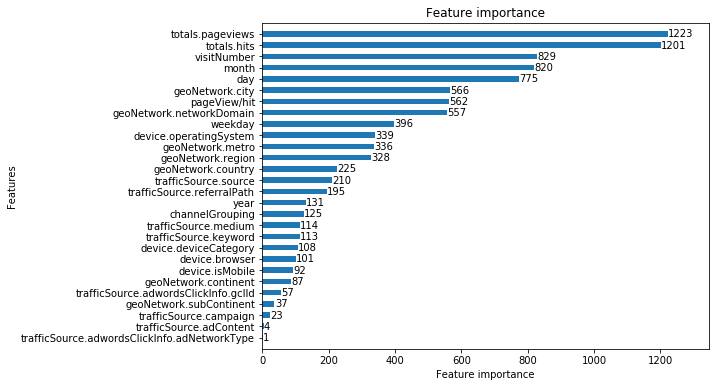

In [224]:
ax = lgb.plot_importance(model,figsize=(8,6),grid=False,height=0.5)

In [220]:
features.remove('visitStartTime')

In [226]:
revSum = data.groupby("fullVisitorId").agg({"totals.transactionRevenue" : "sum"}).reset_index()
revSum['logRevenue'] = np.log1p(revSum['totals.transactionRevenue'])
revSum.head()

,fullVisitorId,totals.transactionRevenue,logRevenue
0,0000010278554503158,0.0,0.0
1,0000020424342248747,0.0,0.0
2,0000027376579751715,0.0,0.0
3,0000039460501403861,0.0,0.0
4,0000040862739425590,0.0,0.0


In [227]:
visitNum = data.groupby("fullVisitorId").agg({"visitNumber" : "max"}).reset_index()
visitNum.head()

,fullVisitorId,visitNumber
0,0000010278554503158,0.000000
1,0000020424342248747,0.000000
2,0000027376579751715,0.000000
3,0000039460501403861,0.000000
4,0000040862739425590,0.002538


In [309]:
from sklearn.model_selection import permutation_test_score as pts
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(visitNum['visitNumber']).reshape(-1,1), revSum['logRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)
print(str(score) + "   " + str(pvalue))


-4.303241290972008   0.000999000999000999


In [310]:
from sklearn.model_selection import permutation_test_score as pts
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['day']).reshape(-1,1), (data['totals.transactionRevenue']), scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)
print(str(score) + "   " + str(pvalue))

-2785610119372755.5   0.9470529470529471


In [232]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['trafficSource.campaign']).reshape(-1,1), (data['totals.transactionRevenue']), scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)
print(str(score) + "   " + str(pvalue))


-2785574920053406.5   0.004995004995004995


In [233]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['channelGrouping']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2785508598782023.5   0.000999000999000999


In [234]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['totals.hits']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2732689616806624.5   0.000999000999000999


In [238]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['totals.pageviews']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2731826895133566.5   0.000999000999000999


In [240]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['pageView/hit']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2780392280406343.5   0.000999000999000999


In [242]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['year']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2785577115990254.5   0.02197802197802198


In [243]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['month']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2785587533806395.0   0.2917082917082917


In [245]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['trafficSource.adwordsClickInfo.gclId']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2785599600952689.5   0.8281718281718282


In [246]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['weekday']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2785471717670501.0   0.000999000999000999


In [248]:
score, permutation_scores, pvalue = pts(
    ridgeReg, np.array(data['trafficSource.referralPath']).reshape(-1,1), data['totals.transactionRevenue'], scoring="neg_mean_squared_error", n_permutations=1000, n_jobs=1)

print(str(score) + "   " + str(pvalue))

-2784001314579385.0   0.000999000999000999


In [290]:
data = predData

In [ ]:
cont0 = data[data['geoNetwork.continent'] == 0]
cont1 = data[data['geoNetwork.continent'] == 1]
cont2 = data[data['geoNetwork.continent'] == 2]
cont3 = data[data['geoNetwork.continent'] == 3]
cont4 = data[data['geoNetwork.continent'] == 4]
cont5 = data[data['geoNetwork.continent'] == 5]

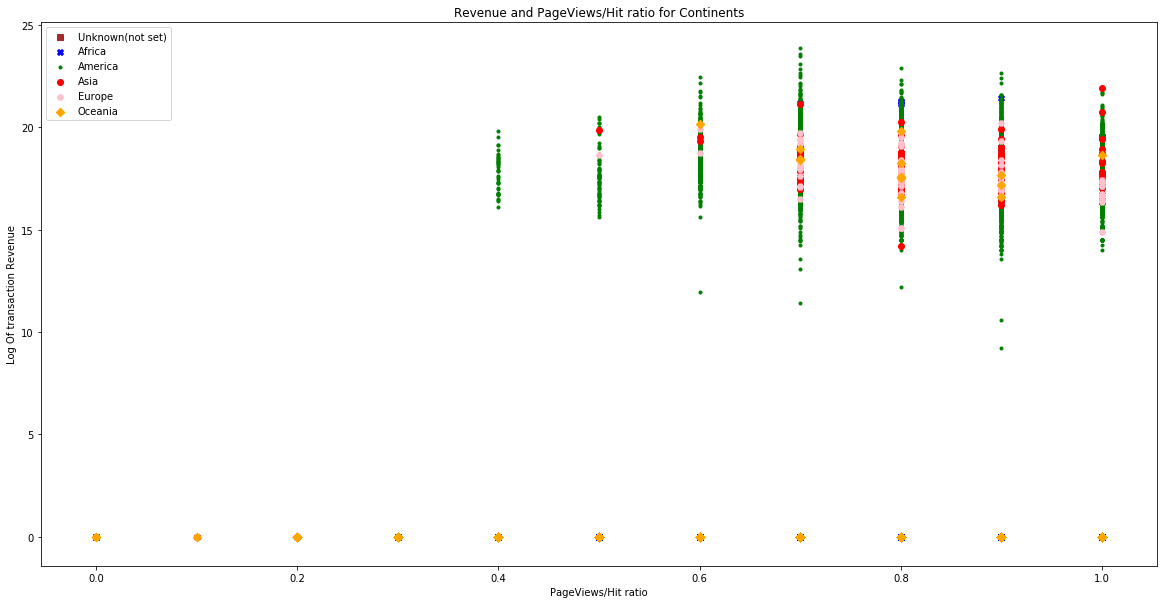

In [316]:
plt.figure(figsize=(20,10))
plt.scatter(cont0['pageView/hit'],np.log1p(cont0['totals.transactionRevenue']),color='brown',label='Unknown(not set)',marker='s')
plt.scatter(cont1['pageView/hit'],np.log1p(cont1['totals.transactionRevenue']),color='blue',label='Africa',marker='X')
plt.scatter(cont2['pageView/hit'],np.log1p(cont2['totals.transactionRevenue']),color='green',label='America',marker='.')
plt.scatter(cont3['pageView/hit'],np.log1p(cont3['totals.transactionRevenue']),color='red',label='Asia')
plt.scatter(cont4['pageView/hit'],np.log1p(cont4['totals.transactionRevenue']),color='pink',label='Europe',marker='H')
plt.scatter(cont5['pageView/hit'],np.log1p(cont5['totals.transactionRevenue']),color='orange',label='Oceania',marker='D')
plt.legend(numpoints=1)
plt.xlabel("PageViews/Hit ratio")
plt.ylabel("Log Of transaction Revenue")
plt.title("Revenue and PageViews/Hit ratio for Continents")
plt.savefig('dotplot.png')



In [341]:
from sklearn.linear_model import LinearRegression
probFeatures = ['visitNumber','totals.hits','totals.pageviews','pageView/hit','day','year']
pdata = data
y = np.log1p(data['totals.transactionRevenue'])
model = LinearRegression()
model.fit(pdata[probFeatures],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [353]:
diffMSE =[]
for i in range(1000):
    visits =pdata['visitNumber'].sample(frac=1).reset_index(drop=True)
    pdata['visitNumber'] =pd.Series(visits)
    predY = model.predict(pdata[probFeatures])
    diff = mean_squared_error(y,predY)
    diffMSE.append(diff)

In [347]:
yest = model.predict(pdata[probFeatures])
diff = mean_squared_error(y,yest)
diff

3.3419572906499164

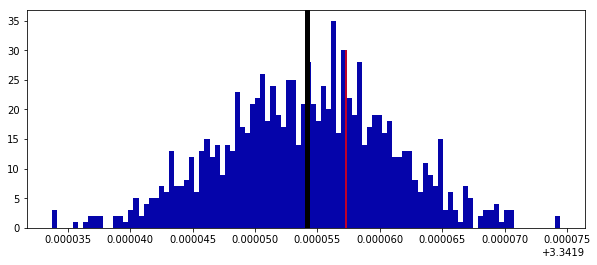

In [348]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(x=diffMSE, bins=100,color='#0504aa')
plt.axvline((np.array(diffMSE)).mean(), color='black', linewidth=5)
plt.vlines(x=diff,ymin=0,ymax=30,color = 'red')
plt.show()

In [349]:
diffMSE =[]
for i in range(1000):
    visits =pdata['day'].sample(frac=1).reset_index(drop=True)
    pdata['day'] =pd.Series(visits)
    predY = model.predict(pdata[probFeatures])
    diff = mean_squared_error(y,predY)
    diffMSE.append(diff)

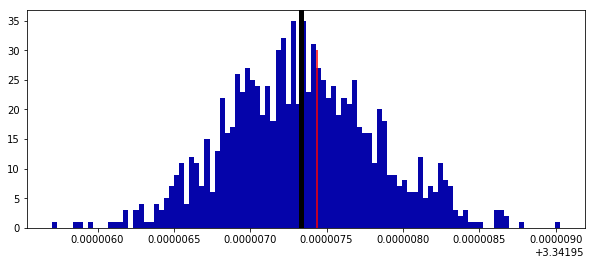

In [350]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(x=diffMSE, bins=100,color='#0504aa')
plt.vlines(x=diff,ymin=0,ymax=30,color = 'red')
plt.axvline((np.array(diffMSE)).mean(), color='black', linewidth=5)
plt.show()

In [351]:
diffMSE =[]
for i in range(1000):
    visits =pdata['pageView/hit'].sample(frac=1).reset_index(drop=True)
    pdata['pageView/hit'] =pd.Series(visits)
    predY = model.predict(pdata[probFeatures])
    diff = mean_squared_error(y,predY)
    diffMSE.append(diff)

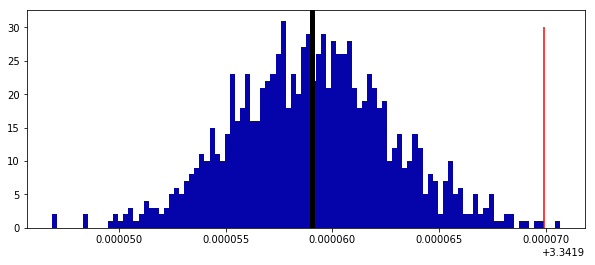

In [352]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(x=diffMSE, bins=100,color='#0504aa')
plt.vlines(x=diff,ymin=0,ymax=30,color = 'red')
plt.axvline((np.array(diffMSE)).mean(), color='black', linewidth=5)
plt.show()